In [68]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import klib
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.signal.signaltools import _centered
from sklearn import neighbors
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [308]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

#model = DecisionTreeRegressor()

In [71]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [72]:
data4 = pd.read_excel('../data/data.xlsx') 

In [73]:
data4.head()

pays Name  annee Formation brute de capital fixe   Inflation  \
0   Algérie   1996               11678773781.756346  24.021904   
1   Algérie   1997               11057526176.064381   7.001963   
2   Algérie   1998               12407428953.506189  -3.131089   
3   Algérie   1999               11863493050.579884  10.856336   
4   Algérie   2000               11329142516.987822  22.678009   

   Transferts personnels  Capitalisation boursière  Aide publique nette reçue  \
0            8.800000e+08                        ..                        ..   
1            1.060000e+09                        ..                        ..   
2            1.060000e+09                        ..                        ..   
3            7.900000e+08          276638442.572457                        ..   
4            7.900000e+08          285296007.050442                        ..   

   Croissance du PIB  PIB par habitant  openning_commercial_rate  \
0           4.099998       2899.193202                  7.241533   
1           1.100000       2884.120228                  7.260363   
2           5.100004       2986.055666                  7.277973   
3           3.200002       3038.272915                  7.276739   
4           3.800000       3111.176169                  7.311305   

   exchange_rate  
0      41.794168  
1      43.892116  
2      46.905652  
3      49.085400  
4      52.141667

In [74]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pays Name                         506 non-null    object 
 1   annee                             506 non-null    int64  
 2   Formation brute de capital fixe   506 non-null    object 
 3   Inflation                         506 non-null    float64
 4   Transferts personnels             506 non-null    float64
 5   Capitalisation boursière          506 non-null    object 
 6   Aide publique nette reçue         506 non-null    object 
 7   Croissance du PIB                 506 non-null    float64
 8   PIB par habitant                  506 non-null    float64
 9   openning_commercial_rate          506 non-null    float64
 10  exchange_rate                     506 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 43.6+ KB


In [75]:
data4.columns = [ 'countries', 'year', 'domestic_investment', 'inflation','remittances','stock_market','public_aid','growth1','growth', 'openning_commercial_rate','exchange_rate']

In [76]:
data4.head()

countries  year domestic_investment  inflation   remittances  \
0   Algérie  1996  11678773781.756346  24.021904  8.800000e+08   
1   Algérie  1997  11057526176.064381   7.001963  1.060000e+09   
2   Algérie  1998  12407428953.506189  -3.131089  1.060000e+09   
3   Algérie  1999  11863493050.579884  10.856336  7.900000e+08   
4   Algérie  2000  11329142516.987822  22.678009  7.900000e+08   

       stock_market public_aid   growth1       growth  \
0                ..         ..  4.099998  2899.193202   
1                ..         ..  1.100000  2884.120228   
2                ..         ..  5.100004  2986.055666   
3  276638442.572457         ..  3.200002  3038.272915   
4  285296007.050442         ..  3.800000  3111.176169   

   openning_commercial_rate  exchange_rate  
0                  7.241533      41.794168  
1                  7.260363      43.892116  
2                  7.277973      46.905652  
3                  7.276739      49.085400  
4                  7.311305      52.141667

In [77]:
data4.dtypes

countries                    object
year                          int64
domestic_investment          object
inflation                   float64
remittances                 float64
stock_market                 object
public_aid                   object
growth1                     float64
growth                      float64
openning_commercial_rate    float64
exchange_rate               float64
dtype: object

In [78]:
data4.shape

(506, 11)

# CONVERT year to datetime

In [79]:
data4['year'] = pd.to_datetime(data4['year'], format='%Y')

In [80]:
data4.head()

countries       year domestic_investment  inflation   remittances  \
0   Algérie 1996-01-01  11678773781.756346  24.021904  8.800000e+08   
1   Algérie 1997-01-01  11057526176.064381   7.001963  1.060000e+09   
2   Algérie 1998-01-01  12407428953.506189  -3.131089  1.060000e+09   
3   Algérie 1999-01-01  11863493050.579884  10.856336  7.900000e+08   
4   Algérie 2000-01-01  11329142516.987822  22.678009  7.900000e+08   

       stock_market public_aid   growth1       growth  \
0                ..         ..  4.099998  2899.193202   
1                ..         ..  1.100000  2884.120228   
2                ..         ..  5.100004  2986.055666   
3  276638442.572457         ..  3.200002  3038.272915   
4  285296007.050442         ..  3.800000  3111.176169   

   openning_commercial_rate  exchange_rate  
0                  7.241533      41.794168  
1                  7.260363      43.892116  
2                  7.277973      46.905652  
3                  7.276739      49.085400  
4                  7.311305      52.141667

In [251]:
data4.dtypes

countries                           object
year                        datetime64[ns]
domestic_investment                 object
inflation                          float64
remittances                        float64
stock_market                        object
public_aid                          object
growth1                            float64
growth                             float64
openning_commercial_rate           float64
exchange_rate                      float64
dtype: object

# replacing ".." by "none"

In [81]:
data5 = data4.replace('..', None)

# CONVERT object to float


In [82]:
data5['domestic_investment'] = data5['domestic_investment'].astype(float, errors = 'raise')

In [83]:
data5['stock_market'] = data5['stock_market'].astype(float, errors = 'raise')

In [84]:
data5['public_aid'] = data5['public_aid'].astype(float, errors = 'raise')

# filling the missing values with the median 

In [85]:
data5.head()

countries       year  domestic_investment  inflation   remittances  \
0   Algérie 1996-01-01         1.167877e+10  24.021904  8.800000e+08   
1   Algérie 1997-01-01         1.105753e+10   7.001963  1.060000e+09   
2   Algérie 1998-01-01         1.240743e+10  -3.131089  1.060000e+09   
3   Algérie 1999-01-01         1.186349e+10  10.856336  7.900000e+08   
4   Algérie 2000-01-01         1.132914e+10  22.678009  7.900000e+08   

   stock_market  public_aid   growth1       growth  openning_commercial_rate  \
0           NaN         NaN  4.099998  2899.193202                  7.241533   
1           NaN         NaN  1.100000  2884.120228                  7.260363   
2           NaN         NaN  5.100004  2986.055666                  7.277973   
3  2.766384e+08         NaN  3.200002  3038.272915                  7.276739   
4  2.852960e+08         NaN  3.800000  3111.176169                  7.311305   

   exchange_rate  
0      41.794168  
1      43.892116  
2      46.905652  
3      49.085400  
4      52.141667

In [86]:
data5['domestic_investment'].fillna(data5['domestic_investment'].median(), inplace=True)

In [87]:
data5['stock_market'].fillna(data5['stock_market'].median(), inplace=True)

In [88]:
data5= data5.drop(['public_aid', 'growth1'], axis=1)

In [89]:
data5.isna().sum()

countries                   0
year                        0
domestic_investment         0
inflation                   0
remittances                 0
stock_market                0
growth                      0
openning_commercial_rate    0
exchange_rate               0
dtype: int64

In [90]:
data5.isna().sum()/data4.shape[0]*100

countries                   0.0
year                        0.0
domestic_investment         0.0
inflation                   0.0
remittances                 0.0
stock_market                0.0
growth                      0.0
openning_commercial_rate    0.0
exchange_rate               0.0
dtype: float64

In [91]:
data5.head()

countries       year  domestic_investment  inflation   remittances  \
0   Algérie 1996-01-01         1.167877e+10  24.021904  8.800000e+08   
1   Algérie 1997-01-01         1.105753e+10   7.001963  1.060000e+09   
2   Algérie 1998-01-01         1.240743e+10  -3.131089  1.060000e+09   
3   Algérie 1999-01-01         1.186349e+10  10.856336  7.900000e+08   
4   Algérie 2000-01-01         1.132914e+10  22.678009  7.900000e+08   

   stock_market       growth  openning_commercial_rate  exchange_rate  
0  6.845791e+10  2899.193202                  7.241533      41.794168  
1  6.845791e+10  2884.120228                  7.260363      43.892116  
2  6.845791e+10  2986.055666                  7.277973      46.905652  
3  2.766384e+08  3038.272915                  7.276739      49.085400  
4  2.852960e+08  3111.176169                  7.311305      52.141667

# numericals and categoricals

In [92]:
numericals1 = data5.select_dtypes(np.number)
display(numericals1.head())
categoricals1 = data5.select_dtypes(object)
display(categoricals1.head())

domestic_investment  inflation   remittances  stock_market       growth  \
0         1.167877e+10  24.021904  8.800000e+08  6.845791e+10  2899.193202   
1         1.105753e+10   7.001963  1.060000e+09  6.845791e+10  2884.120228   
2         1.240743e+10  -3.131089  1.060000e+09  6.845791e+10  2986.055666   
3         1.186349e+10  10.856336  7.900000e+08  2.766384e+08  3038.272915   
4         1.132914e+10  22.678009  7.900000e+08  2.852960e+08  3111.176169   

   openning_commercial_rate  exchange_rate  
0                  7.241533      41.794168  
1                  7.260363      43.892116  
2                  7.277973      46.905652  
3                  7.276739      49.085400  
4                  7.311305      52.141667

countries
0   Algérie
1   Algérie
2   Algérie
3   Algérie
4   Algérie

# checking  outliers

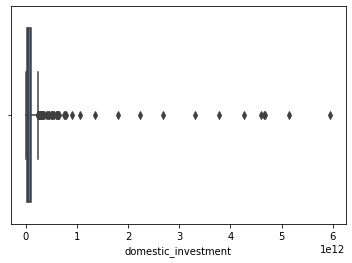

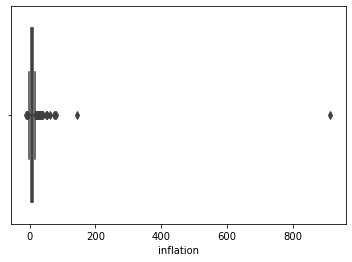

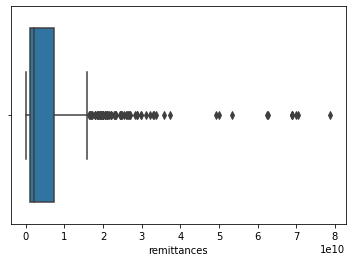

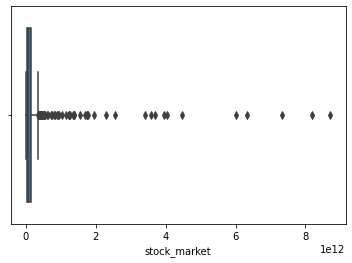

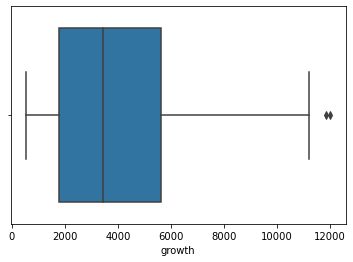

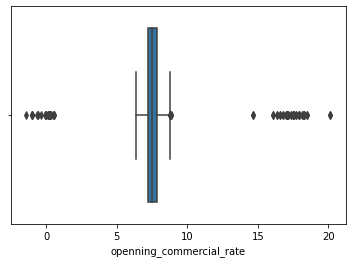

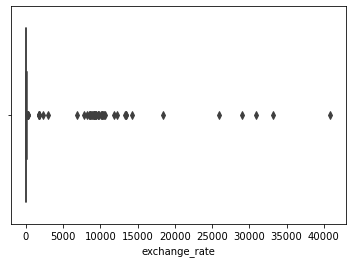

In [93]:
import matplotlib.pyplot as plt
def numeric_outliers(df):
    for i in df.columns:
        sns.boxplot(x=i, data = df);
        plt.show()
    return
    
numeric_outliers(numericals1)

# removing outliers

In [94]:
iqr = np.percentile(numericals1['inflation'],75) - np.percentile(numericals1['inflation'],25)
upper_limit = np.percentile(numericals1['inflation'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['inflation'],25) - 1.5*iqr

In [95]:
numeric_inflation= numericals1[(numericals1['inflation']>lower_limit) & (numericals1['inflation']<upper_limit)]

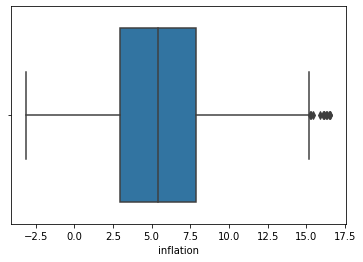

In [96]:
sns.boxplot(x=numeric_inflation['inflation'])
plt.show()

In [97]:
iqr = np.percentile(numericals1['remittances'],75) - np.percentile(numericals1['remittances'],25)
upper_limit = np.percentile(numericals1['remittances'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['remittances'],25) - 1.5*iqr

In [98]:
numeric_remittances= numericals1[(numericals1['remittances']>lower_limit) & (numericals1['remittances']<upper_limit)]

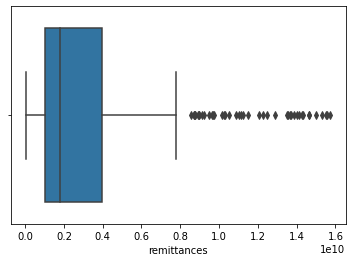

In [99]:
sns.boxplot(x=numeric_remittances['remittances'])
plt.show()

In [100]:
iqr = np.percentile(numericals1['domestic_investment'],75) - np.percentile(numericals1['domestic_investment'],25)
upper_limit = np.percentile(numericals1['domestic_investment'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['domestic_investment'],25) - 1.5*iqr

In [101]:
numeric_domestic_investment= numericals1[(numericals1['domestic_investment']>lower_limit) & (numericals1['domestic_investment']<upper_limit)]

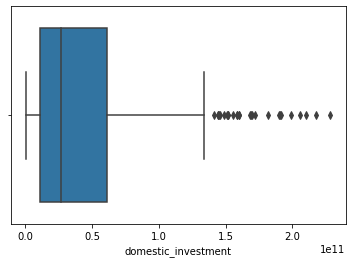

In [102]:
sns.boxplot(x=numeric_domestic_investment['domestic_investment'])
plt.show()

In [103]:
iqr = np.percentile(numericals1['stock_market'],75) - np.percentile(numericals1['stock_market'],25)
upper_limit = np.percentile(numericals1['stock_market'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['stock_market'],25) - 1.5*iqr

In [104]:
numeric_stock_market= numericals1[(numericals1['stock_market']>lower_limit) & (numericals1['stock_market']<upper_limit)]

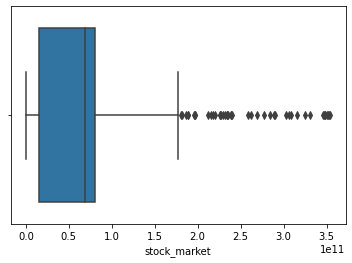

In [105]:
sns.boxplot(x=numeric_stock_market['stock_market'])
plt.show()

In [106]:
iqr = np.percentile(numericals1['exchange_rate'],75) - np.percentile(numericals1['exchange_rate'],25)
upper_limit = np.percentile(numericals1['exchange_rate'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['exchange_rate'],25) - 1.5*iqr

In [107]:
numeric_exchange_rate= numericals1[(numericals1['exchange_rate']>lower_limit) & (numericals1['exchange_rate']<upper_limit)]

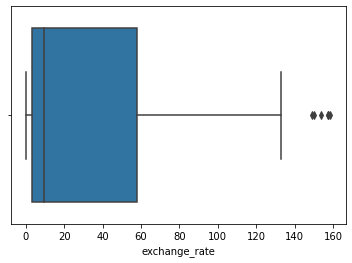

In [108]:
sns.boxplot(x=numeric_exchange_rate['exchange_rate'])
plt.show()

In [109]:
iqr = np.percentile(numericals1['openning_commercial_rate'],75) - np.percentile(numericals1['openning_commercial_rate'],25)
upper_limit = np.percentile(numericals1['openning_commercial_rate'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['openning_commercial_rate'],25) - 1.5*iqr

In [110]:
numeric_openning_commercial_rate= numericals1[(numericals1['openning_commercial_rate']>lower_limit) & (numericals1['openning_commercial_rate']<upper_limit)]

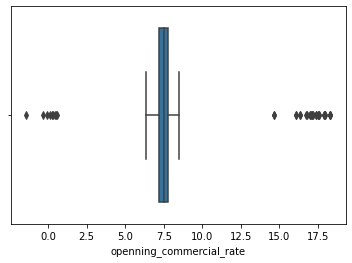

In [111]:
sns.boxplot(x=numeric_stock_market['openning_commercial_rate'])
plt.show()

In [112]:
# Plotting

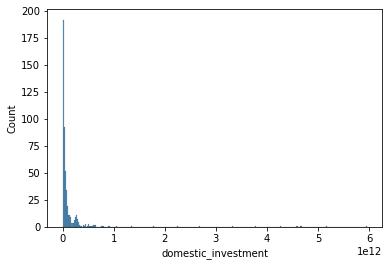

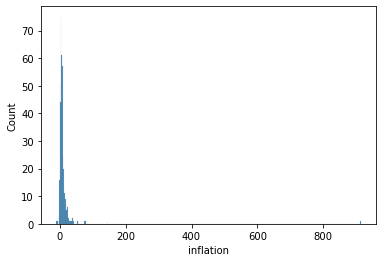

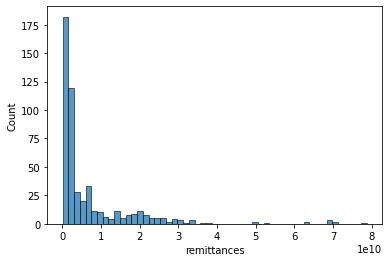

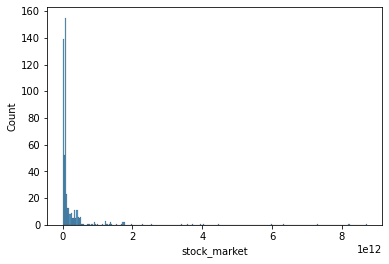

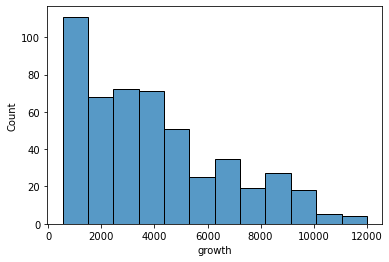

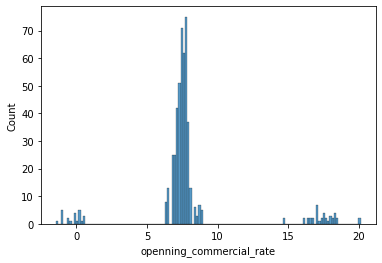

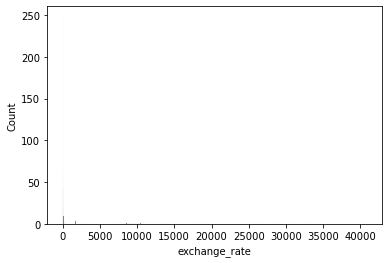

In [113]:
import matplotlib.pyplot as plt
def numeric(df):
    for i in df.columns:
        sns.histplot(x=i, data = df);
        plt.show()
    return
    
numeric(numericals1)

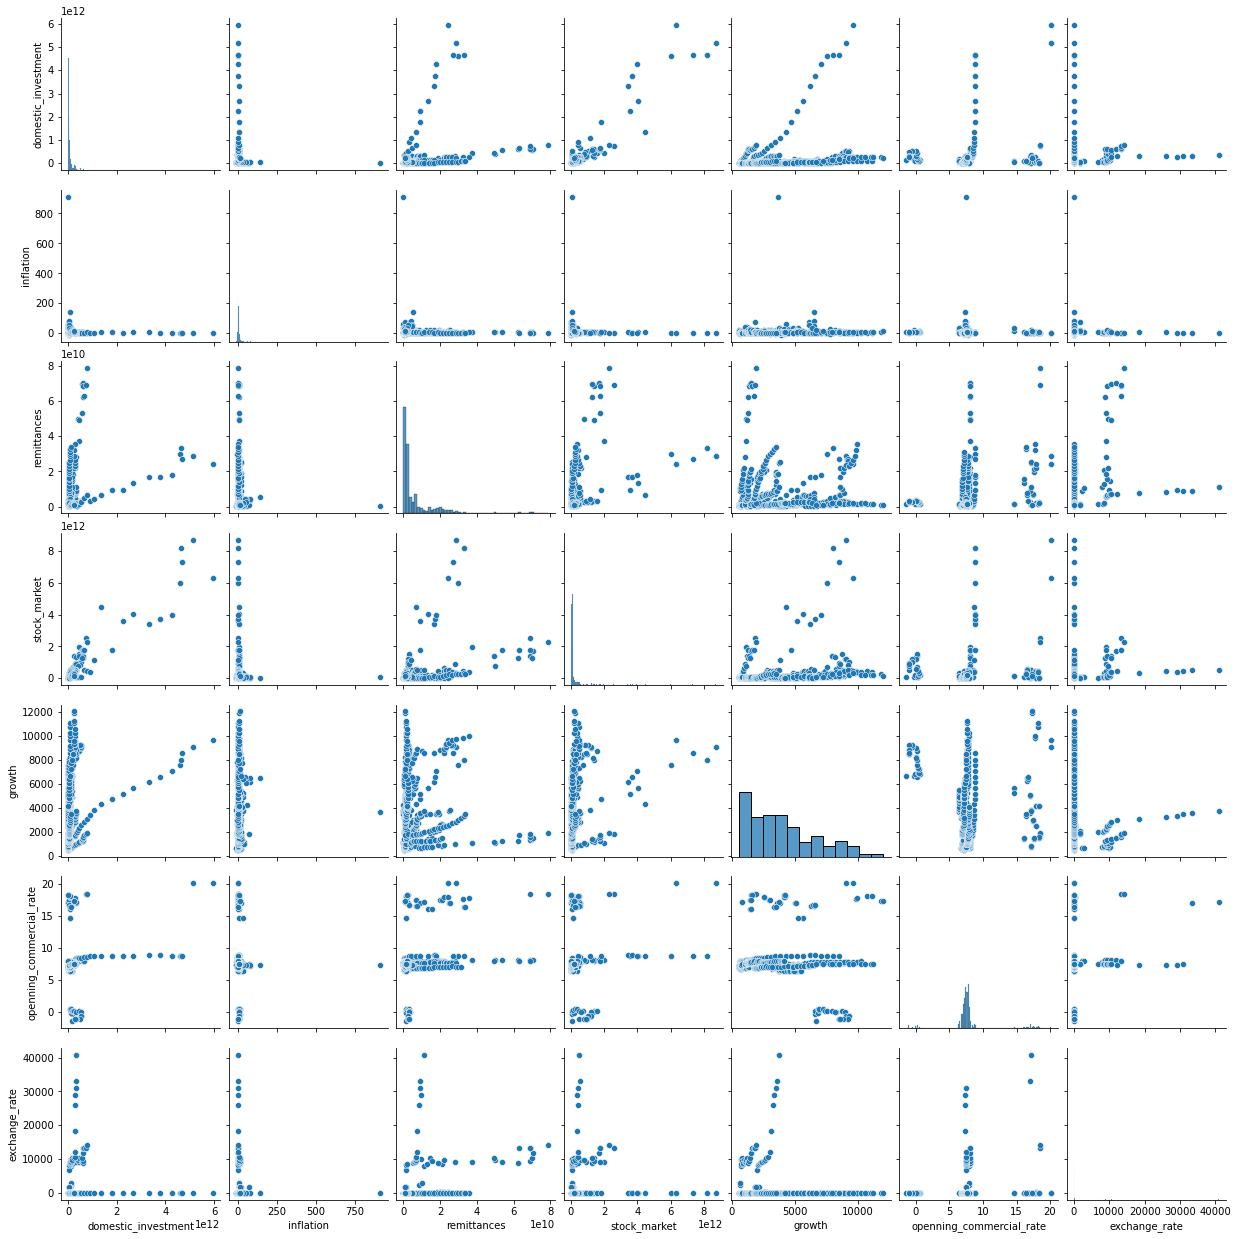

In [114]:
sns.pairplot(numericals1)
plt.show()

# USING the log transormation

In [115]:
numericals1['domestic_investment']=  np.log(numericals1['domestic_investment'])

In [116]:
numericals1['inflation']=  np.log(numericals1['inflation'])

C:\Users\NON\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [117]:
numericals1['remittances']=  np.log(numericals1['remittances'])

In [118]:
numericals1['stock_market']=  np.log(numericals1['stock_market'])

In [119]:
numericals1['growth']=  np.log(numericals1['growth'])

In [120]:
numericals1['exchange_rate']=  np.log(numericals1['exchange_rate'])

In [121]:
numericals1.head()

domestic_investment  inflation  remittances  stock_market    growth  \
0            23.181039   3.178966    20.595432     24.949485  7.972188   
1            23.126377   1.946191    20.781535     24.949485  7.966975   
2            23.241561        NaN    20.781535     24.949485  8.001709   
3            23.196732   2.384749    20.487544     19.438222  8.019045   
4            23.150644   3.121396    20.487544     19.469038  8.042756   

   openning_commercial_rate  exchange_rate  
0                  7.241533       3.732757  
1                  7.260363       3.781735  
2                  7.277973       3.848138  
3                  7.276739       3.893562  
4                  7.311305       3.953964

In [122]:
 # cleaning after log transformation

In [123]:
numericals1.isna().sum()

domestic_investment          0
inflation                   19
remittances                  0
stock_market                 0
growth                       0
openning_commercial_rate     0
exchange_rate                0
dtype: int64

In [124]:
numericals1['inflation'].fillna(numericals1['inflation'].median(), inplace=True)

In [125]:
numericals1.isna().sum()

domestic_investment         0
inflation                   0
remittances                 0
stock_market                0
growth                      0
openning_commercial_rate    0
exchange_rate               0
dtype: int64

# plotting after log

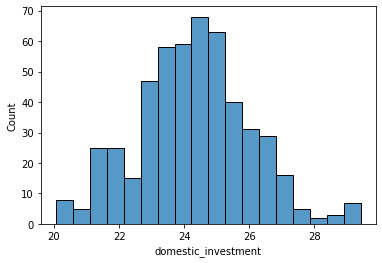

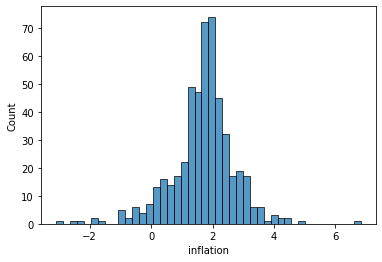

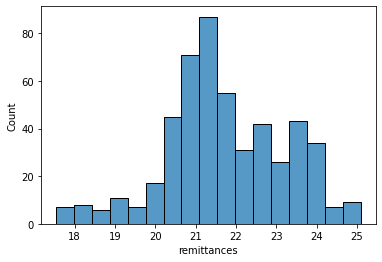

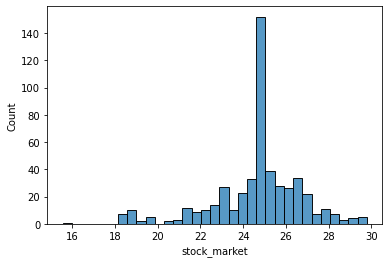

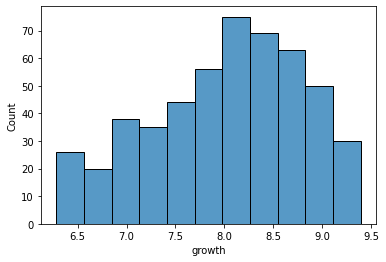

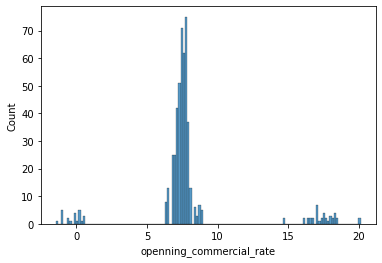

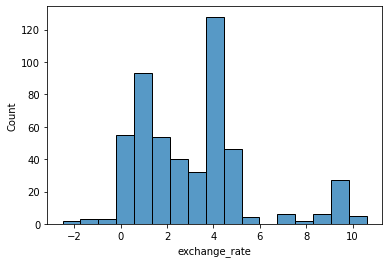

In [127]:
import matplotlib.pyplot as plt
def numeric(df):
    for i in df.columns:
        sns.histplot(x=i, data = df);
        plt.show()
    return
    
numeric(numericals1)

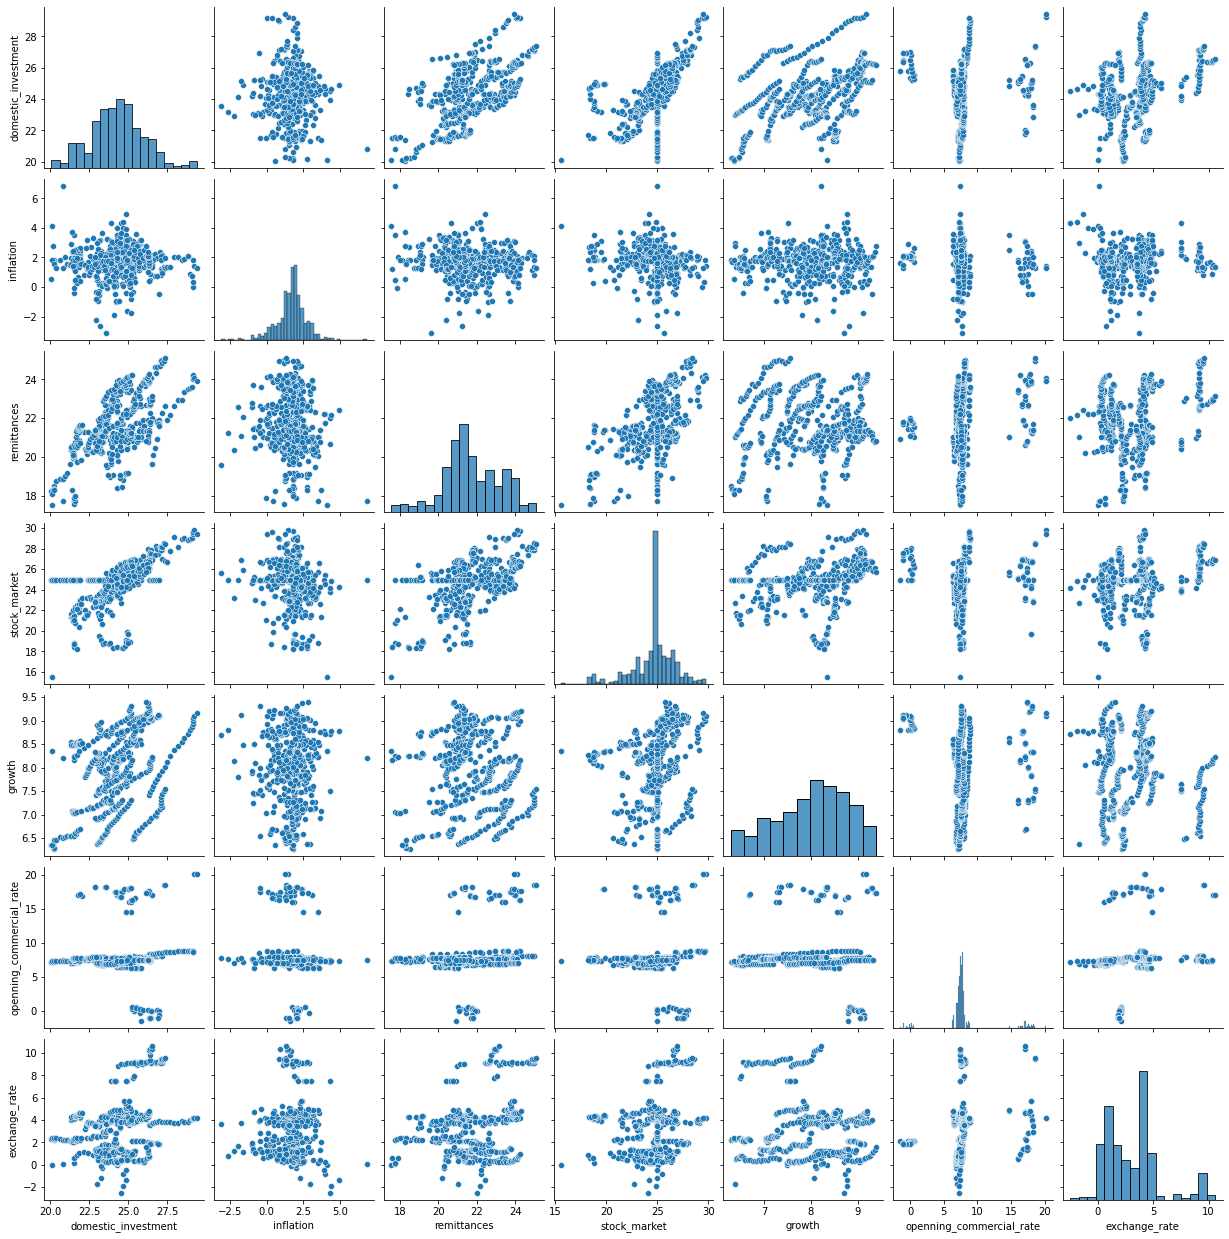

In [128]:
sns.pairplot(numericals1)
plt.show()

# checking outliers After log

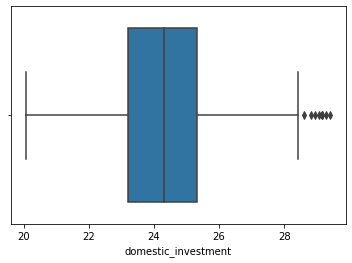

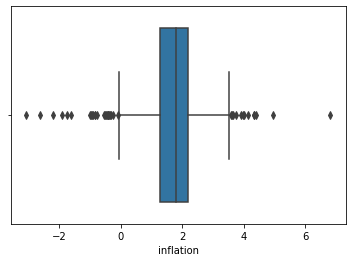

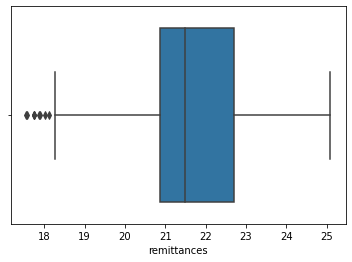

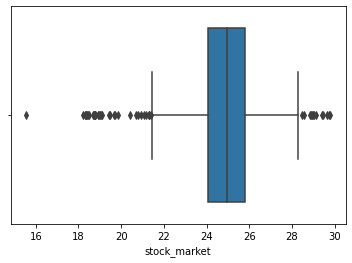

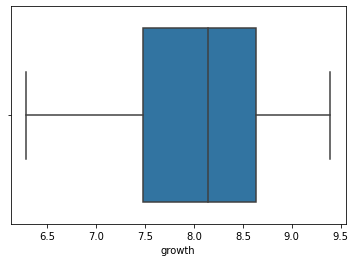

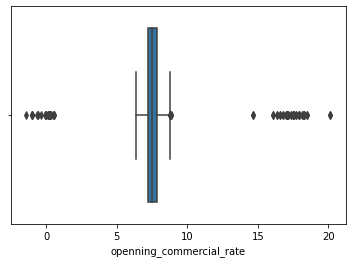

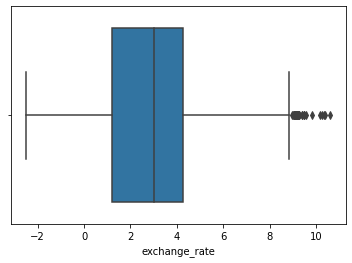

In [129]:
import matplotlib.pyplot as plt
def numeric_outliers(df):
    for i in df.columns:
        sns.boxplot(x=i, data = df);
        plt.show()
    return
    
numeric_outliers(numericals1)

In [130]:
# removing outliers

In [131]:
iqr = np.percentile(numericals1['inflation'],75) - np.percentile(numericals1['inflation'],25)
upper_limit = np.percentile(numericals1['inflation'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['inflation'],25) - 1.5*iqr

In [132]:
numeric_inflation= numericals1[(numericals1['inflation']>lower_limit) & (numericals1['inflation']<upper_limit)]

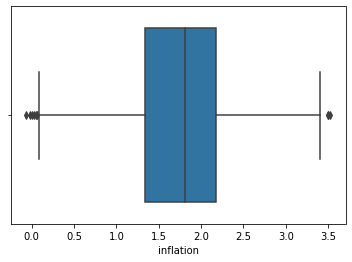

In [133]:
sns.boxplot(x=numeric_inflation['inflation'])
plt.show()

In [134]:
iqr = np.percentile(numericals1['openning_commercial_rate'],75) - np.percentile(numericals1['openning_commercial_rate'],25)
upper_limit = np.percentile(numericals1['openning_commercial_rate'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['openning_commercial_rate'],25) - 1.5*iqr

In [135]:
numeric_openning_commercial_rate= numericals1[(numericals1['openning_commercial_rate']>lower_limit) & (numericals1['openning_commercial_rate']<upper_limit)]

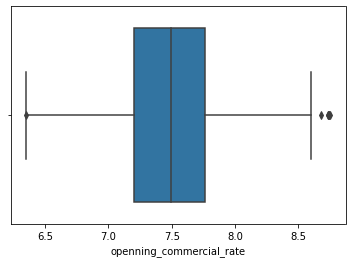

In [136]:
sns.boxplot(x=numeric_openning_commercial_rate['openning_commercial_rate'])
plt.show()

In [137]:
iqr = np.percentile(numericals1['remittances'],75) - np.percentile(numericals1['remittances'],25)
upper_limit = np.percentile(numericals1['remittances'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['remittances'],25) - 1.5*iqr

In [138]:
numeric_remittances= numericals1[(numericals1['remittances']>lower_limit) & (numericals1['remittances']<upper_limit)]

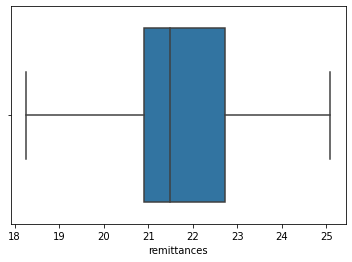

In [139]:
sns.boxplot(x=numeric_remittances['remittances'])
plt.show()

In [140]:
iqr = np.percentile(numericals1['stock_market'],75) - np.percentile(numericals1['stock_market'],25)
upper_limit = np.percentile(numericals1['stock_market'],75) + 1.5*iqr
lower_limit = np.percentile(numericals1['stock_market'],25) - 1.5*iqr

In [141]:
numeric_stock_market= numericals1[(numericals1['stock_market']>lower_limit) & (numericals1['stock_market']<upper_limit)]

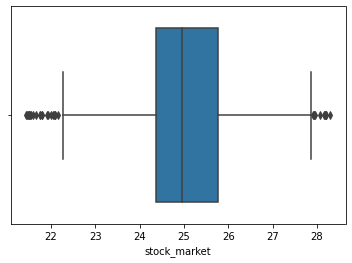

In [142]:
sns.boxplot(x=numeric_stock_market['stock_market'])
plt.show()

In [143]:
# DESCRIPTION of the data


In [144]:
numericals1.describe().T

count       mean       std        min        25%  \
domestic_investment       506.0  24.287440  1.709733  20.064973  23.199950   
inflation                 506.0   1.698205  1.031911  -3.091080   1.279807   
remittances               506.0  21.707009  1.477288  17.541204  20.878523   
stock_market              506.0  24.693263  2.103838  15.538277  24.048477   
growth                    506.0   8.022562  0.774211   6.280363   7.476282   
openning_commercial_rate  506.0   7.921709  3.257794  -1.440420   7.187610   
exchange_rate             506.0   3.131465  2.443710  -2.508320   1.202118   

                                50%        75%        max  
domestic_investment       24.296531  25.321184  29.414910  
inflation                  1.810414   2.184822   6.816968  
remittances               21.485782  22.696860  25.090054  
stock_market              24.949485  25.794204  29.795638  
growth                     8.143098   8.635081   9.393230  
openning_commercial_rate   7.523978   7.818872  20.133139  
exchange_rate              3.021496   4.283722  10.618013

In [145]:
# checking correlation

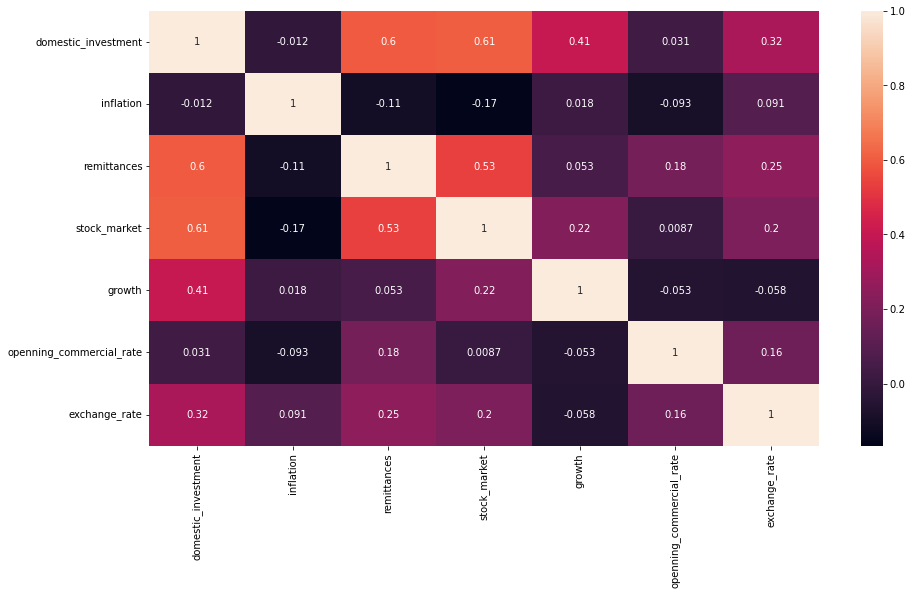

In [146]:
import seaborn as sb
dataplot=sb.heatmap(numericals1.corr(), annot=True,  )
plt.gcf().set_size_inches(15, 8)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

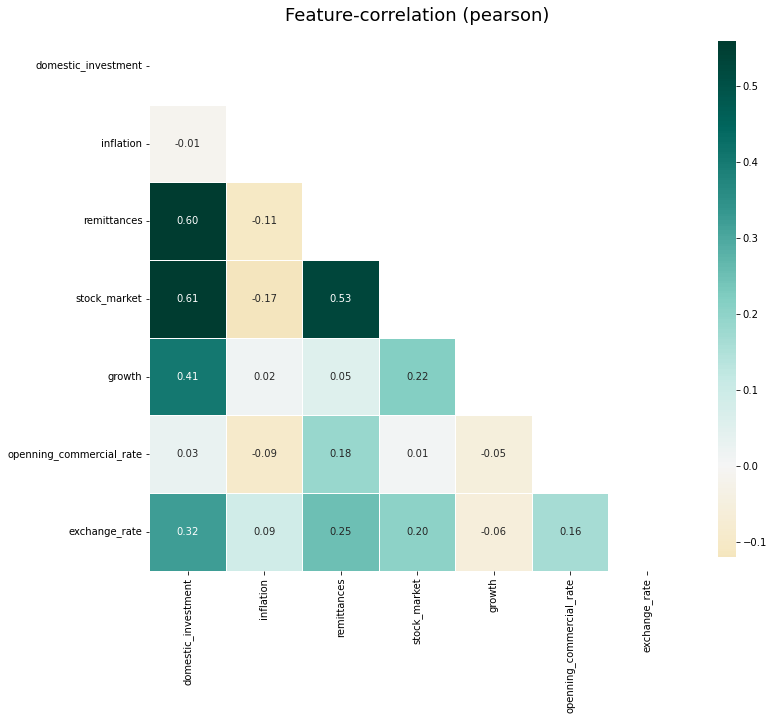

In [147]:
klib.corr_plot(numericals1)

# split

In [149]:
y = numericals1['stock_market']
X = numericals1.drop('stock_market', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [230]:
import seaborn.pairplot

ModuleNotFoundError: No module named 'seaborn.pairplot'

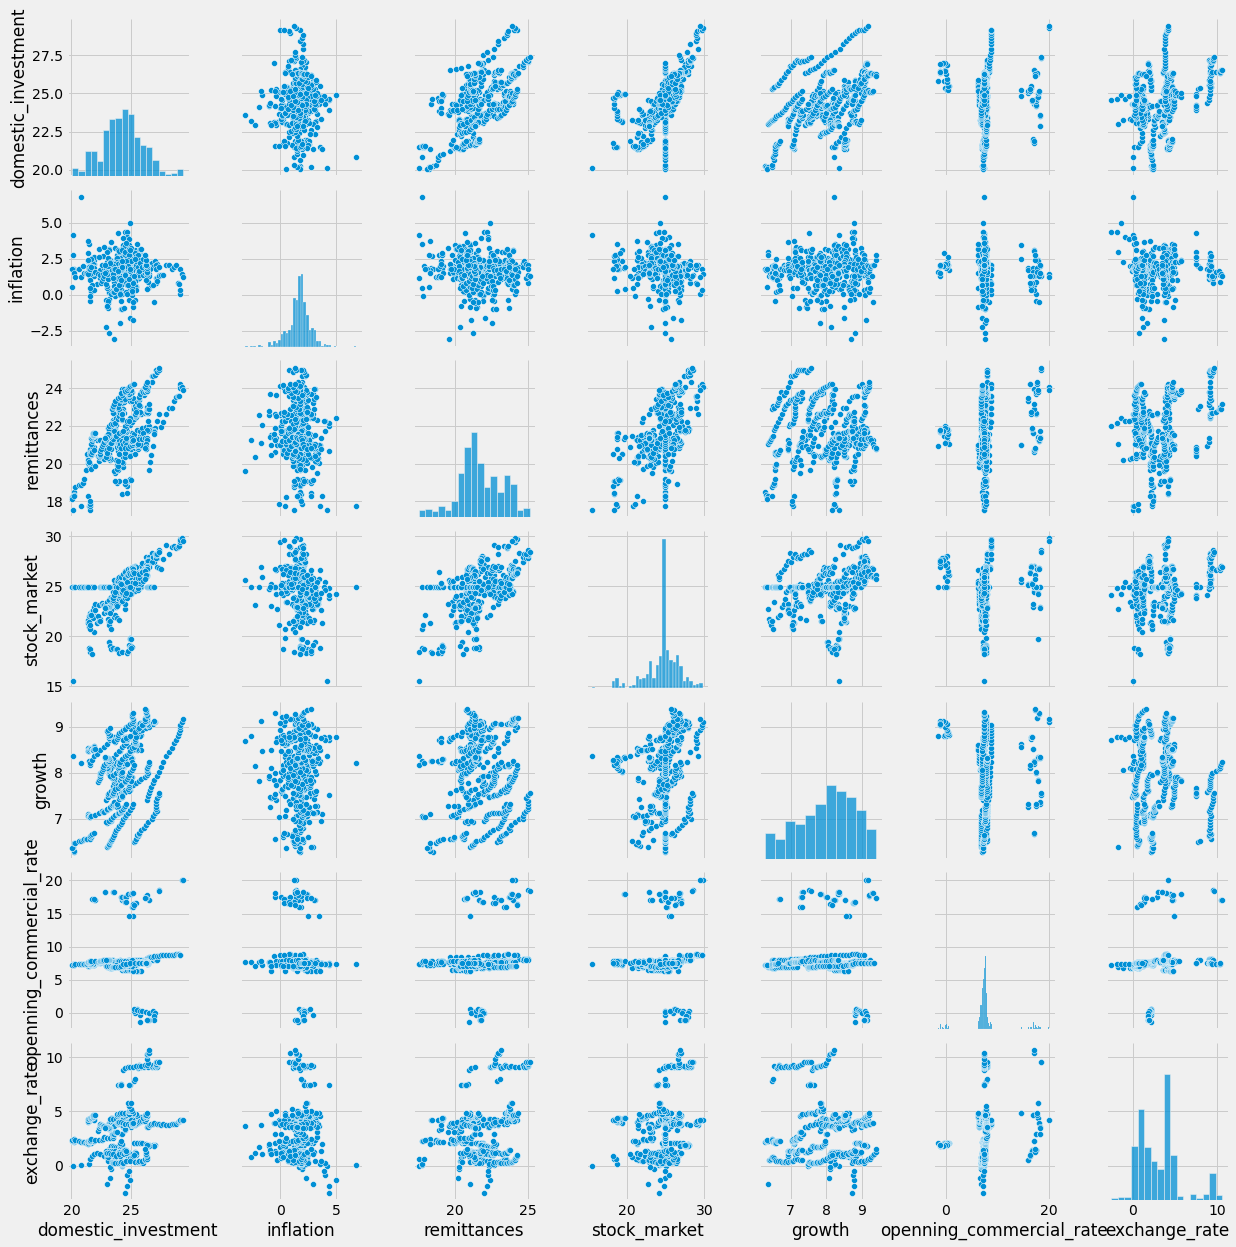

In [232]:
sns.pairplot(numericals1)

In [150]:
X_train

domestic_investment  inflation  remittances    growth  \
305            23.174139   1.316144    21.991340  6.946768   
414            23.231742   2.270861    20.207428  8.069130   
307            23.494945   1.992059    22.095715  7.029209   
292            23.222507   2.253707    20.914725  7.231264   
316            24.153524   1.941033    23.406272  7.162683   
..                   ...        ...          ...       ...   
167            26.968502  -0.507333    21.578987  7.846937   
232            21.403720   2.358500    20.424186  8.483183   
348            25.565479   2.778994    22.617676  9.055682   
189            24.175289   2.659960    20.768239  7.554488   
151            26.844864   1.951660    24.619239  7.058327   

     openning_commercial_rate  exchange_rate  
305                  7.567819       1.335001  
414                  6.754050      -1.176287  
307                  7.623060       1.335001  
292                  7.887294       2.577900  
316                  7.633343       1.147691  
..                        ...            ...  
167                  8.509034       3.883836  
232                  7.070580       4.100438  
348                  7.587922       3.901987  
189                  7.483145       7.469646  
151                  8.009160       9.248593  

[404 rows x 6 columns]

<AxesSubplot:xlabel='exchange_rate', ylabel='Density'>

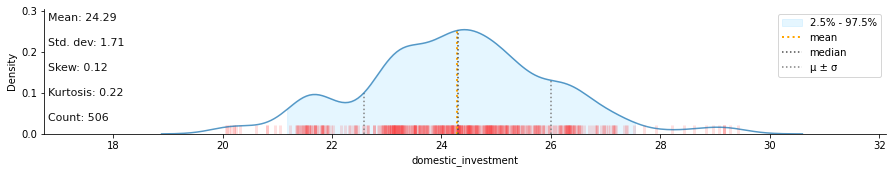

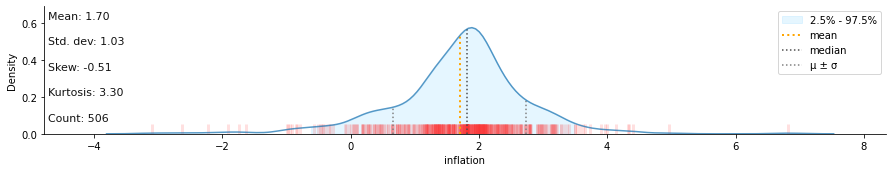

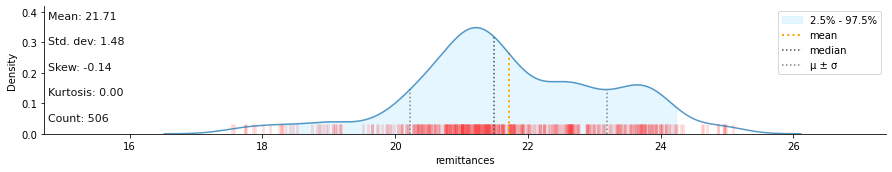

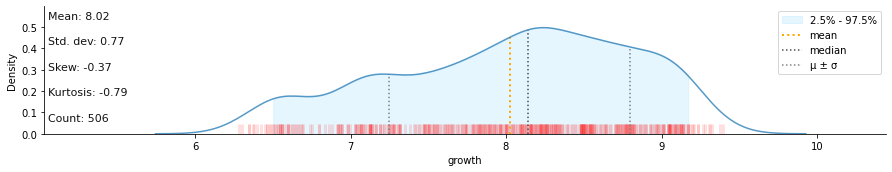

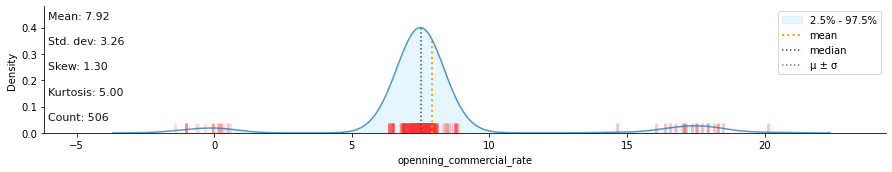

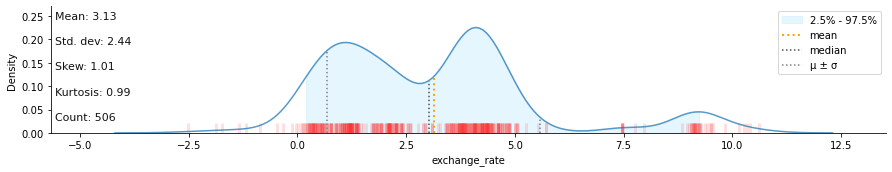

In [151]:
klib.dist_plot(X.select_dtypes(np.number), showall=True)

In [152]:
# Normalization

In [153]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_train)

X_train_minmax_scaled = MinMaxtransformer.transform(X_train)
X_test_minmax_scaled  = MinMaxtransformer.transform(X_test)

X_train_minmax_scaled_df = pd.DataFrame(X_train_minmax_scaled, columns=X_train.columns)
X_test_minmax_scaled_df  = pd.DataFrame(X_test_minmax_scaled, columns=X_test.columns)

# best Regression Model


In [154]:
rmse_val = [] #to store rmse values for different k
knn_models = {}
for K in range(1,20):
    
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    
    knn_models[K] = model_knn 
    pred=model_knn.predict(X_test) #make prediction on test set
    error = (r2_score(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('r2_score value for k= ' , K , 'is:', error)

r2_score value for k=  1 is: 0.7258726772033921
r2_score value for k=  2 is: 0.7305686707564369
r2_score value for k=  3 is: 0.6824857293859965
r2_score value for k=  4 is: 0.6949616742199614
r2_score value for k=  5 is: 0.642899344980967
r2_score value for k=  6 is: 0.6285735083524637
r2_score value for k=  7 is: 0.6171042885194085
r2_score value for k=  8 is: 0.6143891460106559
r2_score value for k=  9 is: 0.5773466816530614
r2_score value for k=  10 is: 0.5710357821164405
r2_score value for k=  11 is: 0.5663001678403566
r2_score value for k=  12 is: 0.5524913492874746
r2_score value for k=  13 is: 0.5331788588282
r2_score value for k=  14 is: 0.5231915346902132
r2_score value for k=  15 is: 0.5197346901871367
r2_score value for k=  16 is: 0.5081013602880109
r2_score value for k=  17 is: 0.5154094853873439
r2_score value for k=  18 is: 0.5110555348965113
r2_score value for k=  19 is: 0.4996084518051195


In [155]:
model_knn

KNeighborsRegressor(n_neighbors=19)

In [156]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 2)
model_knn.fit(X_train, y_train)  #fit the model
    
knn_models[K] = model_knn 
pred_test=model_knn.predict(X_test) #make prediction on test set
pred_train=model_knn.predict(X_train) #make prediction on test set
print('r2_score_test: ', r2_score(y_test,pred_test))
print('r2_score_train: ', r2_score(y_train,pred_train))

r2_score_test:  0.7305686707564369
r2_score_train:  0.918646140223979


<AxesSubplot:>

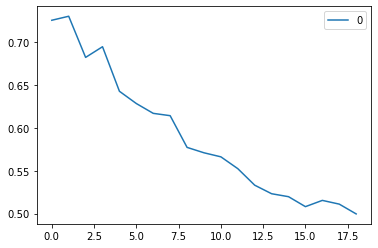

In [157]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

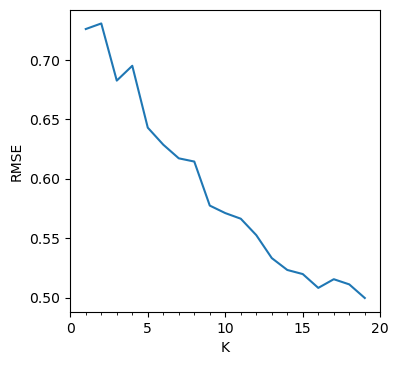

In [158]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(4,4), dpi = 100)
ax.plot(list(range(1,20)),rmse_val);
ax.set_xlim(0,20)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlabel("K")
ax.set_ylabel("RMSE")
plt.show()

# predictions 

In [160]:
y_test_pred_knn = knn_models[2].predict(X_test)
print (y_test_pred_knn)

[24.94948494 22.36314992 23.71042147 26.9144476  25.28113568 24.10808485
 21.45559772 24.46407238 24.94948494 18.96156066 24.94948494 26.63066838
 22.92445967 24.65021959 25.41066205 24.78926423 26.69082075 24.29101449
 26.57191194 24.94948494 24.31748657 25.72825902 26.38836209 18.731782
 27.99402286 24.08264619 24.94948494 26.9144476  20.04902576 24.53546283
 23.2046152  26.29613944 24.94948494 24.94948494 25.56523118 24.20161773
 23.37506801 29.07732128 25.99260313 24.94948494 24.94948494 29.21406235
 24.94948494 25.42527415 21.61803956 26.28788579 24.90868214 24.56991514
 23.97547601 28.94130146 23.71042147 23.43922754 24.88427955 25.41066205
 26.54709051 23.43327753 25.50960815 22.67326095 18.34588941 23.62487095
 25.88093044 23.89624649 23.08782488 24.87382681 26.85355992 26.58107567
 25.88093044 24.53742209 23.31567217 22.91790888 22.00378228 24.33485375
 25.01088351 24.94948494 23.92054611 21.73567044 25.38321912 25.61315676
 26.0656333  24.42553678 23.10816566 26.03627649 22.3

In [161]:
y_train_pred_knn = knn_models[2].predict(X_train)
print (y_train_pred_knn)

[24.94948494 24.08264619 24.53546283 24.94948494 24.94948494 24.94948494
 24.74776744 24.94948494 24.90868214 23.93066852 24.94948494 24.05499631
 24.94948494 26.85355992 25.93972373 25.36753325 24.94948494 25.3336949
 24.92728487 23.13137987 24.94948494 23.15560938 27.74361379 24.80384021
 21.45559772 25.38995419 23.18564279 21.77083489 24.94140989 23.15560938
 24.78507015 24.43039083 23.10816566 25.10533686 25.44988705 25.32704526
 25.55740258 26.68290075 25.79875874 24.80384021 21.99424481 23.21109394
 26.9144476  19.31085141 24.94948494 23.91228672 25.85286304 24.20161773
 19.70761338 24.94948494 26.39165911 24.42553678 24.81912694 23.22440213
 25.33758163 25.80558237 24.31721205 23.22529599 25.92214854 24.94948494
 25.10533686 24.94948494 21.45559772 26.13150377 23.83157367 24.97909586
 25.24493062 26.28788579 24.94948494 23.43327753 26.69082075 26.44392368
 24.11753838 26.70462257 24.39703445 27.24308663 24.94948494 24.94948494
 24.51238832 28.94130146 24.94948494 24.66028065 26.

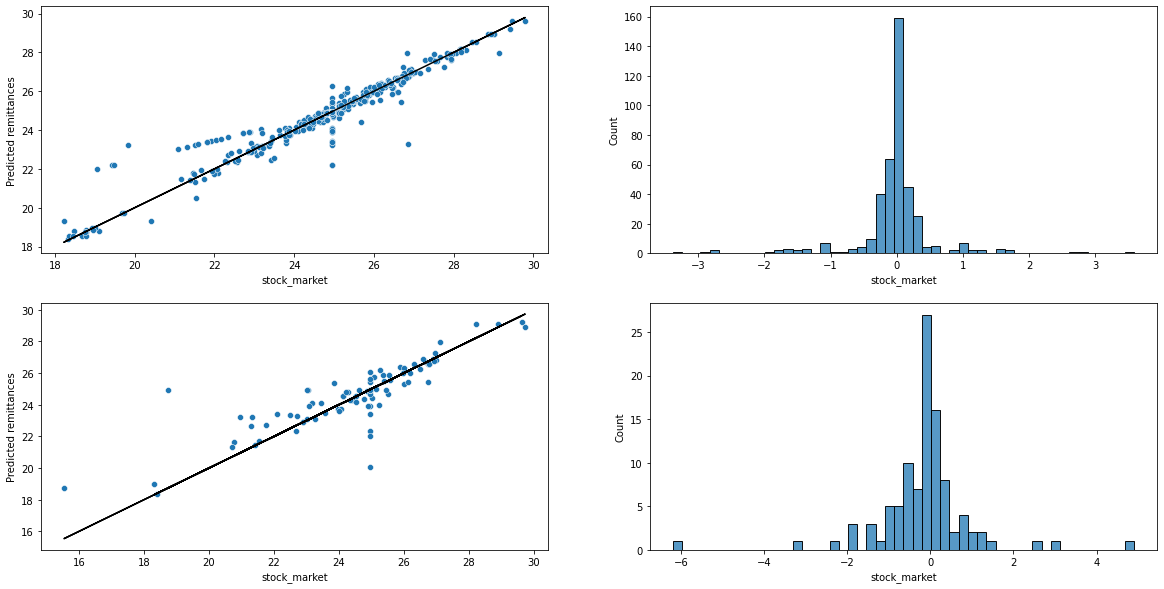

In [162]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x=y_train, y=y_train_pred_knn, ax = ax[0,0])
sns.histplot(x=y_train-y_train_pred_knn, ax = ax[0,1], bins = 50)
ax[0,0].plot(y_train, y_train, color = "black")
ax[0,0].set_ylabel("Predicted remittances")
sns.scatterplot(x=y_test, y=y_test_pred_knn, ax = ax[1,0])
sns.histplot(x=y_test-y_test_pred_knn, ax = ax[1,1], bins=50)
ax[1,0].plot(y_test, y_test, color="black")
ax[1,0].set_ylabel("Predicted remittances")
plt.show()

In [163]:
# linear regression

In [164]:
import sklearn
from sklearn import linear_model
sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score
y_pred_train_lm = lm.predict(X_train)
r2_score(y_train, y_pred_train_lm)

0.41965587889593003

In [165]:
y_pred_test_lm = lm.predict(X_test)
r2_score(y_test, y_pred_test_lm)

0.4854339950259884

In [166]:
from sklearn.metrics import mean_squared_error
rmse_lm = np.sqrt(mean_squared_error(y_test,y_pred_test_lm))

rmse_lm

1.5877135990857207

In [167]:
from sklearn.metrics import mean_absolute_error, r2_score

mae_lm = mean_absolute_error(y_test, y_pred_test_lm)

In [168]:
mae_lm

1.065477389512956

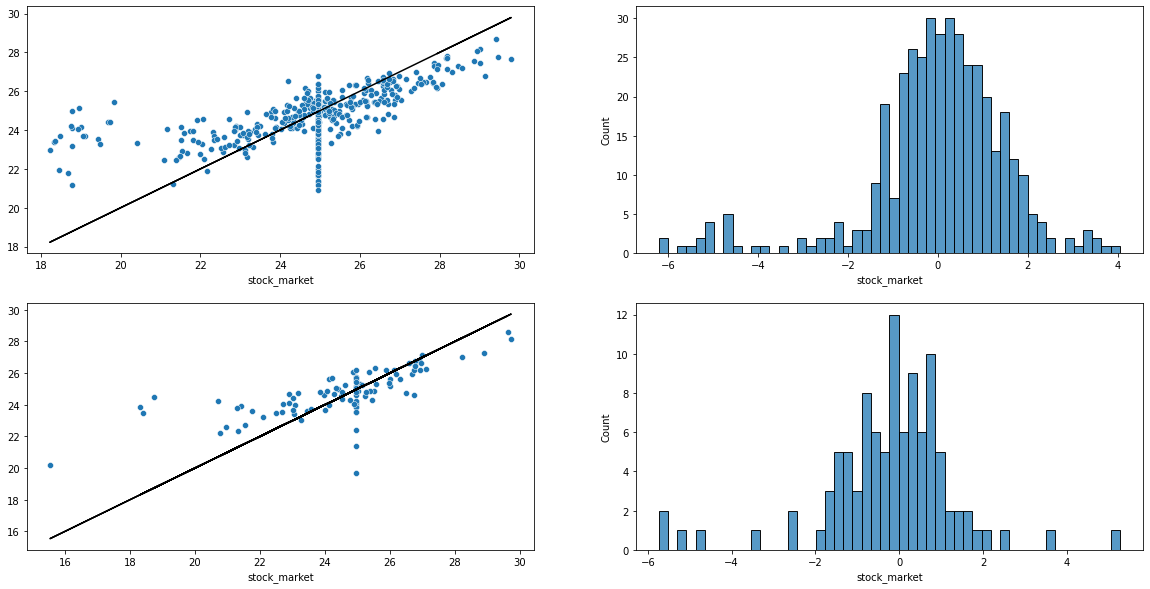

In [169]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x=y_train, y=y_pred_train_lm, ax = ax[0,0])
sns.histplot(x=y_train-y_pred_train_lm, ax = ax[0,1], bins = 50)
ax[0,0].plot(y_train, y_train, color = "black")
sns.scatterplot(x=y_test, y=y_pred_test_lm, ax = ax[1,0])
sns.histplot(x=y_test-y_pred_test_lm, ax = ax[1,1], bins=50)
ax[1,0].plot(y_test, y_test, color="black")
plt.show()

In [170]:
figure = px.scatter(data_frame = numericals1, 
                    x="remittances",
                    y="stock_market", 
                    #color="model"
                    #size="remittances", 
                    trendline="ols", 
                    title = "Relationship Between remittances and stock_market")   
figure.show()

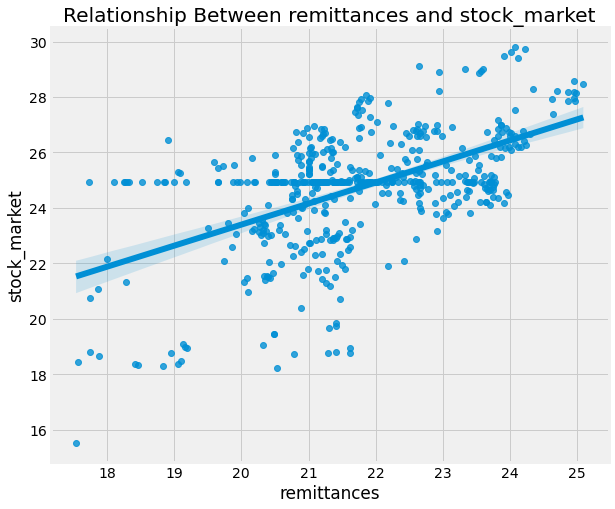

In [171]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Relationship Between remittances and stock_market")
sns.regplot(x="remittances", y="stock_market", data=numericals1)
plt.show()

# Comparing several models

In [173]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor(n_neighbors=2)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# data should really be scaled here
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=3))
    scores[model_name] = mean_score
print(scores)

# We can use the result to choose the best performing model

{'Decision Tree Regressor': 0.4860896383284186, 'Linear Regression': 0.4327109970732928, 'KNN': 0.6087589941915333}


In [174]:
list(zip(model_pipeline, model_names))

[(DecisionTreeRegressor(), 'Decision Tree Regressor'),
 (LinearRegression(), 'Linear Regression'),
 (KNeighborsRegressor(n_neighbors=2), 'KNN')]

In [175]:
val_scores = {}

for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train, y_train)
    val_scores[model_name] = model.score(X_val,y_val)
print(val_scores)

{'Decision Tree Regressor': 0.6815041779480555, 'Linear Regression': 0.39895743461110256, 'KNN': 0.6902940550079234}


# Random Forest

In [176]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
                       #random_state=0, shuffle=False)
#regr = RandomForestRegressor(max_depth=2, random_state=0)
#regr.fit(X, y)
#RandomForestRegressor(...)
#print(regr.predict([[0, 0, 0, 0]]))
#[-8.32987858]

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

clf = RandomForestRegressor(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))
y_pred_rf = clf.predict(X_test)
display(y_test.value_counts())
#confusion_matrix(y_test, y_pred_rf)

The R2 for the Random Forest in the TRAIN set is 0.59
The R2 for the Random Forest in the TEST  set is 0.56


24.949485    24
24.076739     1
25.157373     1
24.769410     1
22.890347     1
             ..
21.318260     1
24.536954     1
26.587026     1
23.463845     1
26.963500     1
Name: stock_market, Length: 79, dtype: int64

In [178]:
y_pred_rf_test = clf.predict(X_test)

In [179]:
y_pred_rf_test

array([23.71902698, 23.73774321, 24.11650736, 26.91385749, 24.69576325,
       24.20652611, 23.19614533, 25.67599838, 23.65115786, 23.0895891 ,
       24.12632462, 27.15607087, 23.58070397, 24.28557161, 25.9922818 ,
       24.42699387, 25.92932544, 24.36259262, 25.92932544, 24.80049785,
       24.41006746, 26.03245867, 26.03474501, 22.45541001, 27.38022177,
       22.79342173, 23.53001887, 26.30838442, 22.46356406, 24.27798919,
       23.30565407, 26.34046305, 24.68611053, 24.56680217, 25.7427466 ,
       24.21450811, 23.4108244 , 27.48619528, 26.08187896, 25.88345242,
       23.58249521, 27.55447945, 23.86277278, 26.34401173, 23.46163216,
       25.00025335, 24.44936327, 24.43094559, 23.73282124, 27.55447945,
       24.20540338, 23.28663371, 24.90544118, 25.81206724, 24.91210797,
       23.89982203, 25.43778538, 23.16433291, 23.01038343, 23.34736646,
       26.21930444, 24.11269632, 23.6459879 , 26.03245867, 26.58873554,
       27.19508975, 26.15360908, 24.91038083, 23.32877391, 24.11

In [180]:
y_pref_rf_train= clf.predict(X_train)

In [181]:
y_pref_rf_train

array([23.2873988 , 23.2125487 , 26.0116096 , 23.02926894, 24.58446375,
       25.92932544, 25.73255091, 26.41068227, 23.64668937, 23.73282124,
       24.62653483, 27.45817534, 23.09774341, 23.83479913, 24.55063986,
       23.85187484, 24.36403146, 25.95308575, 27.3578644 , 26.0085821 ,
       23.49783   , 27.21481032, 27.55447945, 23.32877391, 23.5373046 ,
       23.68926985, 24.80049785, 24.39374275, 24.91210797, 25.01571364,
       24.35854451, 27.55447945, 23.44680404, 27.47359262, 24.5216802 ,
       27.54123501, 26.90362965, 27.55447945, 24.45540833, 24.10775229,
       23.32142018, 26.13820706, 23.47616253, 23.60244919, 24.11638852,
       23.58070397, 26.89134483, 24.90049732, 23.73341626, 23.78879905,
       23.56968237, 22.42836228, 24.85067956, 24.92278746, 25.86268661,
       24.72492745, 23.49888646, 24.82661047, 25.9922818 , 24.0818114 ,
       23.5903283 , 23.4088392 , 25.67599838, 25.05887649, 25.7020713 ,
       27.55447945, 24.51911937, 26.01522991, 23.49328129, 27.47

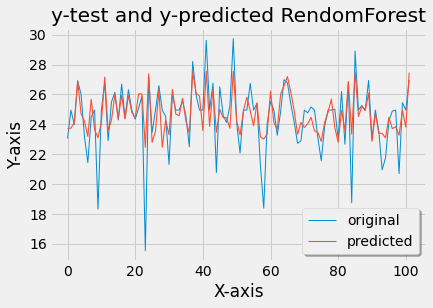

In [183]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_rf, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted RendomForest")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

 # cross validation

In [184]:
# For cross validation
from sklearn.model_selection import cross_val_score

clf = RandomForestRegressor(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8)

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.52


In [185]:
cross_val_scores

array([0.52891094, 0.62001476, 0.4862795 , 0.28821889, 0.53460932,
       0.59725208, 0.67596798, 0.47954938, 0.35440274, 0.60861752])

In [186]:
X_train

domestic_investment  inflation  remittances    growth  \
438            22.314748   2.647970    20.344207  7.847250   
235            21.584676   2.055068    20.768813  8.490793   
505            26.165317   2.801894    20.838379  9.393230   
5              23.249280   1.810414    20.322788  8.059217   
489            24.568905   3.626334    21.383890  8.759846   
..                   ...        ...          ...       ...   
313            23.948744   2.384187    22.994360  7.121958   
256            20.146222   2.790309    18.273437  6.377267   
484            24.638361   4.400049    22.157636  8.775052   
446            22.658048   1.429315    21.054491  8.116884   
416            23.276615   1.681031    20.287857  8.092086   

     openning_commercial_rate  exchange_rate  
438                  7.712424       3.445671  
235                  7.148005       4.363903  
505                 17.363059       1.574509  
5                    7.353593       4.021893  
489                  7.410436       0.410271  
..                        ...            ...  
313                  7.647401       1.169719  
256                  7.247592       2.282833  
484                  7.319064      -1.884763  
446                  7.912205       3.694368  
416                  6.845864      -0.119282  

[404 rows x 6 columns]

|y|y_pred_rf|y_pred_knn|y_pred_lm|set|
|-|---------|----------|---------|---|
|1|0.98|0.45|0.75|train|
|1.3|0.89|1.1|1.2|train|
|2|1.45|1.76|2.0|test|

|y|key|value|
|-|-|-|
|1|y_pred_rf|0.98|

In [188]:
matrix2= pd.DataFrame({'y_test': y_test, 'y_pred_rf': y_pred_rf, 'y_pred_test_lm': y_pred_test_lm, 'y_test_pred_knn': y_test_pred_knn })

In [189]:
matrix2

y_test  y_pred_rf  y_pred_test_lm  y_test_pred_knn
291  23.045909  23.719027       23.419070        24.949485
119  24.949485  23.737743       23.957792        22.363150
464  23.980618  24.116507       24.633399        23.710421
363  26.897563  26.913857       26.801698        26.914448
379  26.007126  24.695763       25.158062        25.281136
..         ...        ...             ...              ...
442  24.949485  23.829841       23.555471        24.949485
28   20.701327  23.269965       24.229137        21.338566
486  25.448136  24.922787       24.291873        24.901660
115  24.949485  23.805196       24.817080        24.949485
168  26.963500  27.458175       26.624231        27.243087

[102 rows x 4 columns]

In [190]:
figure2 = px.scatter(data_frame = matrix2, 
                    y= 'y_test',
                    x='y_pred_test_lm', 
                    #x='y_test_pred_knn',
                    color="y_pred_test_lm",
                    #size="remittances", 
                    trendline="ols", 
                    title = "Relationship Between ytest and y predicted")   
figure2.show()

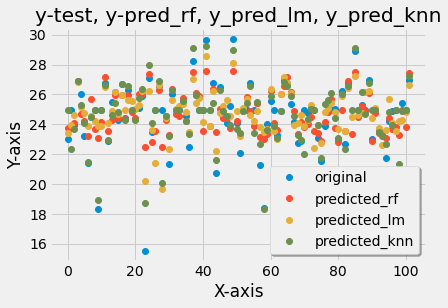

In [191]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, marker="o",linewidth=0, label="original")
plt.plot(x_ax, y_pred_rf, marker="o",linewidth=0, label="predicted_rf" )
plt.plot(x_ax,y_pred_test_lm, marker="o",linewidth=0, label="predicted_lm" )
plt.plot(x_ax,y_test_pred_knn, marker="o",linewidth=0, label="predicted_knn" )
plt.title("y-test, y-pred_rf, y_pred_lm, y_pred_knn")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.plot(40,20)
plt.show()

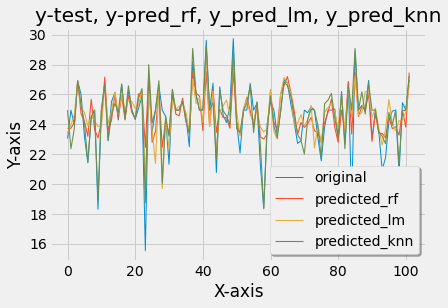

In [192]:
plt.plot(figsize=(3, 3))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_rf, linewidth=1.1, label="predicted_rf" )
plt.plot(x_ax,y_pred_test_lm, linewidth=1.1, label="predicted_lm" )
plt.plot(x_ax,y_test_pred_knn, linewidth=1.1, label="predicted_knn" )
plt.title("y-test, y-pred_rf, y_pred_lm, y_pred_knn")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
#plt.plot(5,5)
#plt.plot(10, 10)
plt.show()

In [196]:
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_selector(X)

[]

# to find the model which will best perform on a given dataset

In [197]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB206A0>),
                                ('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB205B0>)])

In [198]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)
linear_preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicator=True))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB206A0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB205B0>)])

In [199]:
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
lasso_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB206A0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB205B0>)])),
                ('lassocv', LassoCV())])

In [200]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=42))
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB206A0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB205B0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [201]:
from sklearn.ensemble import HistGradientBoostingRegressor

gbdt_pipeline = make_pipeline(
    tree_preprocessor, HistGradientBoostingRegressor(random_state=0)
)
gbdt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB206A0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB205B0>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=0))])

In [202]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ("Random Forest", rf_pipeline),
    ("Lasso", lasso_pipeline),
    ("Gradient Boosting", gbdt_pipeline),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor

StackingRegressor(estimators=[('Random Forest',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('simpleimputer',
                                                                                 SimpleImputer(add_indicator=True),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB206A0>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                unknown_value=-1),
                                                                                 <sklearn.com...
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB206A0>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                unknown_value=-1),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001CECFB205B0>)])),
                                               ('histgradientboostingregressor',
                                                HistGradientBoostingRegressor(random_state=0))]))],
                  final_estimator=RidgeCV())

# We check the performance of each individual predictor as well as of the stack of the regressors.

# The function plot_regression_results is used to plot the predicted and true targets.

# Ensemble learning is a technique widely used by machine learning practitioners, that combines the skills of different models to make predictions from the given data. We are using this to combine the best of multiple algorithms that can give more stable predictions with very little variance than what we get with a single regressor.

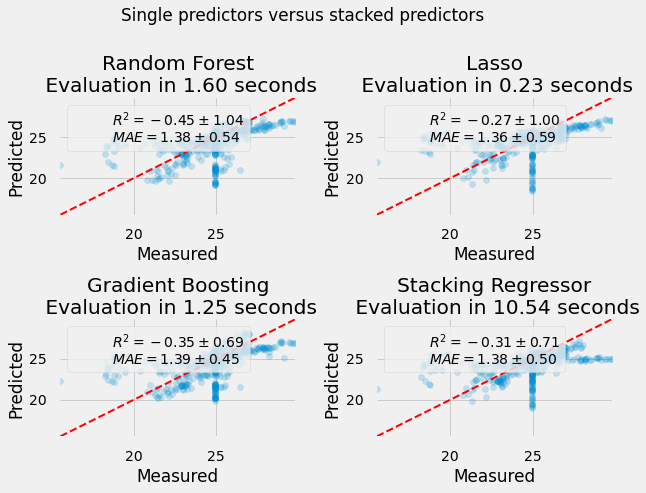

In [203]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    start_time = time.time()
    score = cross_validate(
        est, X, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=2, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=2, verbose=0)

    plot_regression_results(
        ax,
        y,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.mean(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.mean(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

# The stacked regressor will combine the strengths of the different regressors. However, we also see that training the stacked regressor is much more computationally expensive.
# The performance of stacking is usually close to the best model and sometimes it can outperform the prediction performance of each individual model.

In [205]:
import shap
print(shap.__version__)

0.40.0


In [206]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [207]:
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

In [208]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [209]:
y = numericals1['stock_market']
X = numericals1.drop(columns='stock_market') 

In [210]:
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [211]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

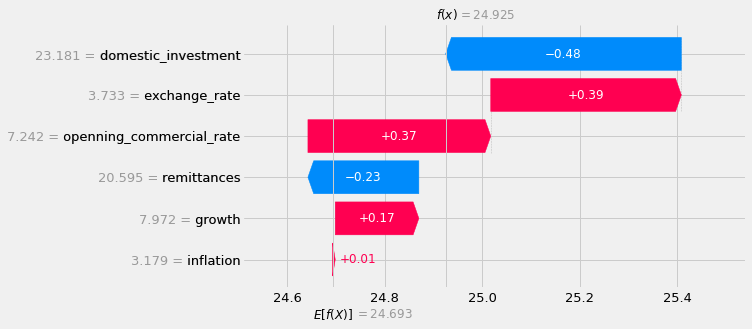

In [212]:
shap.plots.waterfall(shap_values[0])

In [213]:
shap.plots.force(shap_values[0])

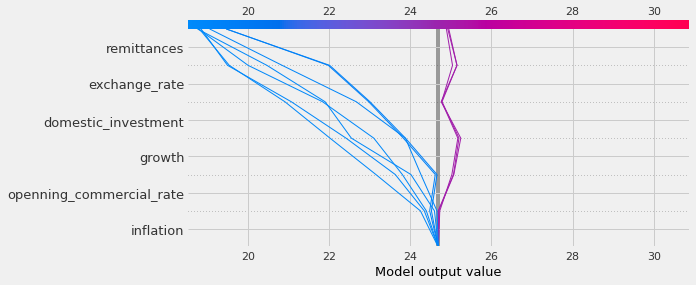

In [214]:
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns))

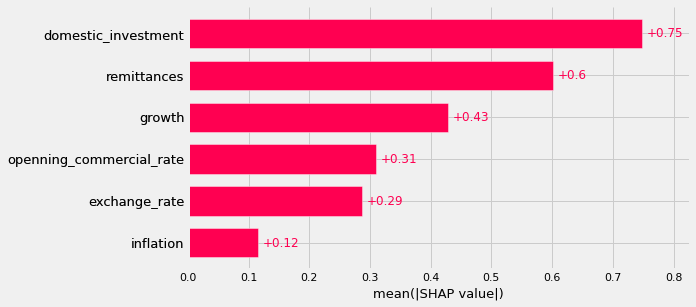

In [215]:
shap.plots.bar(shap_values)

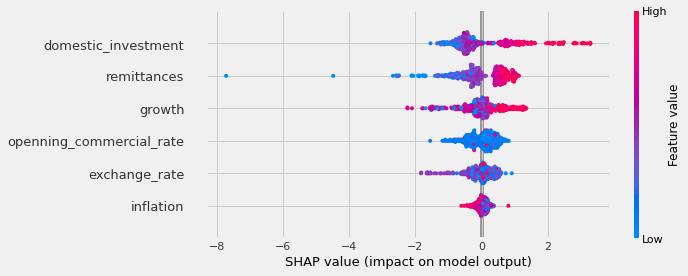

In [216]:
shap.plots.beeswarm(shap_values)

In [253]:
year = pd.read_excel('year.xlsx')

In [280]:
frames = pd.concat([numericals1, categoricals1, year],axis=1)
frames = frames.sort_values(by=["countries","year"])
#result = pd.concat(frames)

In [282]:
frames

domestic_investment  inflation  remittances  stock_market    growth  \
0              23.181039   3.178966    20.595432     24.949485  7.972188   
1              23.126377   1.946191    20.781535     24.949485  7.966975   
2              23.241561   1.810414    20.781535     24.949485  8.001709   
3              23.196732   2.384749    20.487544     19.438222  8.019045   
4              23.150644   3.121396    20.487544     19.469038  8.042756   
..                   ...        ...          ...           ...       ...   
110            24.361725   2.420157    23.697284     24.972955  8.157618   
111            24.529357   2.295650    23.631554     24.734081  8.178339   
112            24.596609   1.831887    23.645911     24.229514  8.199435   
113            24.276865   3.132557    23.931582     24.563709  8.219489   
114            24.426532   3.064616    23.962560     24.461068  8.250933   

     openning_commercial_rate  exchange_rate countries  year  
0                    7.241533       3.732757   Algérie  1996  
1                    7.260363       3.781735   Algérie  1997  
2                    7.277973       3.848138   Algérie  1998  
3                    7.276739       3.893562   Algérie  1999  
4                    7.311305       3.953964   Algérie  2000  
..                        ...            ...       ...   ...  
110                  7.410287       4.389238    Égypte  2014  
111                  7.418597       4.612061    Égypte  2015  
112                  7.421749       4.695404    Égypte  2016  
113                 17.085586       4.709287    Égypte  2017  
114                 17.087398       4.758696    Égypte  2018  

[506 rows x 9 columns]

In [281]:
frames.to_csv("data8.csv", index = False)

In [370]:
frames.to_csv(r'C:\Users\NON\Documents\ironhack\class\projet\data8.csv', index=False)

In [372]:
frames.head()

domestic_investment  inflation  remittances  stock_market    growth  \
0            23.181039   3.178966    20.595432     24.949485  7.972188   
1            23.126377   1.946191    20.781535     24.949485  7.966975   
2            23.241561   1.810414    20.781535     24.949485  8.001709   
3            23.196732   2.384749    20.487544     19.438222  8.019045   
4            23.150644   3.121396    20.487544     19.469038  8.042756   

   openning_commercial_rate  exchange_rate countries  year  
0                  7.241533       3.732757   Algérie  1996  
1                  7.260363       3.781735   Algérie  1997  
2                  7.277973       3.848138   Algérie  1998  
3                  7.276739       3.893562   Algérie  1999  
4                  7.311305       3.953964   Algérie  2000

# Stationarity of variables

In [291]:
#fig, ax = plt.subplots(figsize=(10,10),dpi=200)
#sns.lineplot(data=frames,x = "year", y="remittances", hue="countries", ax = ax)
#plt.show()

import plotly.express as px


fig = px.line(frames, x="year", y="remittances", color="countries", title='Remittances by country')
fig.update_layout(
    xaxis=dict(
        tickmode = "linear",
        tick0 = frames['year'].values.min(),
        dtick = 1
         )
)
fig.update_xaxes(
        tickangle = -45)

fig.show()


In [292]:
frames.head()

domestic_investment  inflation  remittances  stock_market    growth  \
0            23.181039   3.178966    20.595432     24.949485  7.972188   
1            23.126377   1.946191    20.781535     24.949485  7.966975   
2            23.241561   1.810414    20.781535     24.949485  8.001709   
3            23.196732   2.384749    20.487544     19.438222  8.019045   
4            23.150644   3.121396    20.487544     19.469038  8.042756   

   openning_commercial_rate  exchange_rate countries  year  
0                  7.241533       3.732757   Algérie  1996  
1                  7.260363       3.781735   Algérie  1997  
2                  7.277973       3.848138   Algérie  1998  
3                  7.276739       3.893562   Algérie  1999  
4                  7.311305       3.953964   Algérie  2000

In [301]:
ts = frames.set_index("year")
ts

domestic_investment  inflation  remittances  stock_market    growth  \
year                                                                        
1996            23.181039   3.178966    20.595432     24.949485  7.972188   
1997            23.126377   1.946191    20.781535     24.949485  7.966975   
1998            23.241561   1.810414    20.781535     24.949485  8.001709   
1999            23.196732   2.384749    20.487544     19.438222  8.019045   
2000            23.150644   3.121396    20.487544     19.469038  8.042756   
...                   ...        ...          ...           ...       ...   
2014            24.361725   2.420157    23.697284     24.972955  8.157618   
2015            24.529357   2.295650    23.631554     24.734081  8.178339   
2016            24.596609   1.831887    23.645911     24.229514  8.199435   
2017            24.276865   3.132557    23.931582     24.563709  8.219489   
2018            24.426532   3.064616    23.962560     24.461068  8.250933   

      openning_commercial_rate  exchange_rate countries  
year                                                     
1996                  7.241533       3.732757   Algérie  
1997                  7.260363       3.781735   Algérie  
1998                  7.277973       3.848138   Algérie  
1999                  7.276739       3.893562   Algérie  
2000                  7.311305       3.953964   Algérie  
...                        ...            ...       ...  
2014                  7.410287       4.389238    Égypte  
2015                  7.418597       4.612061    Égypte  
2016                  7.421749       4.695404    Égypte  
2017                 17.085586       4.709287    Égypte  
2018                 17.087398       4.758696    Égypte  

[506 rows x 8 columns]

In [302]:
ts[ts['countries']=="Algérie"]

domestic_investment  inflation  remittances  stock_market    growth  \
year                                                                        
1996            23.181039   3.178966    20.595432     24.949485  7.972188   
1997            23.126377   1.946191    20.781535     24.949485  7.966975   
1998            23.241561   1.810414    20.781535     24.949485  8.001709   
1999            23.196732   2.384749    20.487544     19.438222  8.019045   
2000            23.150644   3.121396    20.487544     19.469038  8.042756   
2001            23.249280   1.810414    20.322788     19.058080  8.059217   
2002            23.358517   0.277956    20.790924     18.741688  8.100954   
2003            23.517301   2.119952    21.282882     18.776077  8.157721   
2004            23.743461   2.505333    21.623427     18.750648  8.186644   
2005            23.862482   2.780393    18.951309     18.769422  8.230070   
2006            24.023173   2.355813    19.057258     18.361959  8.232216   
2007            24.293710   1.855569    18.410677     18.386745  8.250137   
2008            24.635042   2.728544    18.456356     18.329820  8.257491   
2009            24.683405   1.810414    18.828390     18.315965  8.256144   
2010            24.792141   2.780060    19.096627     18.473391  8.273461   
2011            24.871874   2.902960    19.128075     19.097689  8.283215   
2012            24.888198   2.009332    19.185410     18.932400  8.297135   
2013            24.995788   1.810414    19.160718     18.990721  8.304723   
2014            25.089098   1.810414    21.620350     18.941192  8.321683   
2015            24.973726   1.810414    21.415109     18.785461  8.337562   
2016            24.956413   0.437532    21.410910     19.841810  8.348547   
2017            24.962689   1.854837    21.306535     19.682386  8.341014   
2018            24.977832   1.926135    21.408884     19.732840  8.331880   

      openning_commercial_rate  exchange_rate countries  
year                                                     
1996                  7.241533       3.732757   Algérie  
1997                  7.260363       3.781735   Algérie  
1998                  7.277973       3.848138   Algérie  
1999                  7.276739       3.893562   Algérie  
2000                  7.311305       3.953964   Algérie  
2001                  7.353593       4.021893   Algérie  
2002                  7.331944       4.058510   Algérie  
2003                  7.338289       4.063027   Algérie  
2004                  7.590552       4.086189   Algérie  
2005                  7.715464       4.163987   Algérie  
2006                  7.776078       4.233138   Algérie  
2007                  7.811567       4.232291   Algérie  
2008                  7.798214       4.228267   Algérie  
2009                  7.775042       4.234673   Algérie  
2010                  7.759794       4.243473   Algérie  
2011                  7.848962       4.306122   Algérie  
2012                  7.873396       4.405043   Algérie  
2013                  7.860669       4.358031   Algérie  
2014                  7.848934       4.352101   Algérie  
2015                  7.828700       4.356028   Algérie  
2016                  7.789537       4.365054   Algérie  
2017                 17.936072       4.387481   Algérie  
2018                 17.936072       4.424442   Algérie

In [304]:
ts[ts['countries']=="Algérie"]['remittances']

year
1996    20.595432
1997    20.781535
1998    20.781535
1999    20.487544
2000    20.487544
2001    20.322788
2002    20.790924
2003    21.282882
2004    21.623427
2005    18.951309
2006    19.057258
2007    18.410677
2008    18.456356
2009    18.828390
2010    19.096627
2011    19.128075
2012    19.185410
2013    19.160718
2014    21.620350
2015    21.415109
2016    21.410910
2017    21.306535
2018    21.408884
Name: remittances, dtype: float64

# ADF test

In [309]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", lags = "auto") # In later versions, the "lags" option has been replaced by "nlags"
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [305]:
adf_test(ts[ts['countries']=="Algérie"]['remittances'])

Results of Dickey-Fuller Test:
Test Statistic                -9.330193e+00
p-value                        9.373702e-16
#Lags Used                     8.000000e+00
Number of Observations Used    1.400000e+01
Critical Value (1%)           -4.012034e+00
Critical Value (5%)           -3.104184e+00
Critical Value (10%)          -2.690987e+00
dtype: float64


In [344]:
adf_test(ts[ts['countries']=="Algérie"]['stock_market'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.859979
p-value                         0.050204
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [345]:
adf_test(ts[ts['countries']=="Algérie"]['inflation'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.126831
p-value                         0.233863
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


In [346]:
adf_test(ts[ts['countries']=="Algérie"]['domestic_investment'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.728705
p-value                         0.839173
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [347]:
adf_test(ts[ts['countries']=="Algérie"]['exchange_rate'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.128822
p-value                         0.024492
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


In [348]:
adf_test(ts[ts['countries']=="Algérie"]['openning_commercial_rate'])

Results of Dickey-Fuller Test:
Test Statistic                  2.321314
p-value                         0.998968
#Lags Used                      9.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


# Kpss test

In [350]:
kpss_test(ts[ts['countries']=="Algérie"]['stock_market'])

Results of KPSS Test:
Test Statistic           0.336035
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [310]:
kpss_test(ts[ts['countries']=="Algérie"]['remittances'])

Results of KPSS Test:
Test Statistic           0.138868
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [351]:
kpss_test(ts[ts['countries']=="Algérie"]['openning_commercial_rate'])

Results of KPSS Test:
Test Statistic           0.436259
p-value                  0.061526
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [352]:
kpss_test(ts[ts['countries']=="Algérie"]['exchange_rate'])

Results of KPSS Test:
Test Statistic           0.664243
p-value                  0.016796
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [353]:
kpss_test(ts[ts['countries']=="Algérie"]['domestic_investment'])

Results of KPSS Test:
Test Statistic           0.633547
p-value                  0.019587
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [354]:
kpss_test(ts[ts['countries']=="Algérie"]['inflation'])

Results of KPSS Test:
Test Statistic           0.209565
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [311]:
#from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(ts[ts['countries']=="Algérie"]['remittances'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -9.330193e+00
p-value                        9.373702e-16
#lags used                     8.000000e+00
number of observations used    1.400000e+01
critical value (1%)           -4.012034e+00
critical value (5%)           -3.104184e+00
critical value (10%)          -2.690987e+00
dtype: float64


In [239]:
#pip install numpy scipy patsy pandas

Note: you may need to restart the kernel to use updated packages.


In [312]:
pip install -U statsmodels

  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2



ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\NON\\anaconda3\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [313]:
import statsmodels.formula.api as smf

In [314]:
sm.__version__

'0.12.2'

In [316]:
conda install -c conda-forge statsmodels

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\NON\anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       h5b45459_0         188 KB  conda-forge
    certifi-2022.6.15          |   py39hcbf5309_0         155 KB  conda-forge
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    openssl-1.1.1p             |       h8ffe710_0         5.8 MB  conda-forge
    pandas-1.4.3               |   py39h2e25243_0        11.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    scikit-learn-1.0.2         |   py39hf11a4ad_1         5.1 MB
    scipy-1.7.3                |   py39h0a974cb_0        13.9 MB
    ------------------------------------------------------------
                                       


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==custom=py39_1
  - defaults/win-64::astropy==4.3.1=py39hc7d831d_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_0
  - defaults/noarch::dask==2021.10.0=pyhd3eb1b0_0
  - defaults/win-64::patsy==0.5.2=py39haa95532_0
  - defaults/win-64::scikit-image==0.18.3=py39hf11a4ad_0
  - defaults/win-64::scikit-learn-intelex==2021.3.0=py39haa95532_0
  - defaults/noarch::seaborn==0.11.2=pyhd3eb1b0_0
  - defaults/win-64::statsmodels==0.12.2=py39h2bbff1b_0
  - defaults/win-64::_anaconda_depends==2021.11=py39_0


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda





certifi-2022.6.15    | 155 KB    | ########## | 100% 
certifi-2022.6.15    | 155 KB    | ########## | 100% 

pandas-1.4.3         | 11.0 MB   |            |   0% 
pandas-1.4.3         | 11.0 MB   | 5          |   5% 
pandas-1.4.3         | 11.0 MB   | #7         |  17% 
pandas-1.4.3         | 11.0 MB   | ##8        |  29% 
pandas-1.4.3         | 11.0 MB   | ####       |  41% 
pandas-1.4.3         | 11.0 MB   | #####2     |  53% 
pandas-1.4.3         | 11.0 MB   | ######3    |  64% 
pandas-1.4.3         | 11.0 MB   | #######5   |  75% 
pandas-1.4.3         | 11.0 MB   | ########7  |  87% 
pandas-1.4.3         | 11.0 MB   | #########9 |  99% 
pandas-1.4.3         | 11.0 MB   | ########## | 100% 

conda-4.13.0         | 1.0 MB    |            |   0% 
conda-4.13.0         | 1.0 MB    | #####7     |  58% 
conda-4.13.0         | 1.0 MB    | ########## | 100% 

scikit-learn-1.0.2   | 5.1 MB    |            |   0% 
scikit-learn-1.0.2   | 5.1 MB    | 7          |   7% 
scikit-learn-1.0.2   | 5

In [317]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [318]:
from statsmodels.tsa.api import ARDL
from statsmodels.datasets import danish_data
data = danish_data.load_pandas().data
lrm = data.lrm
exog = data[["stock_market", "remittances", "inflation"]]

ImportError: cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\Users\NON\anaconda3\lib\site-packages\statsmodels\tsa\api.py)

In [332]:
X = frames.remittances  # response
y = frames.stock_market  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

const  remittances
0    1.0    20.595432
1    1.0    20.781535
2    1.0    20.781535
3    1.0    20.487544
4    1.0    20.487544

In [333]:
est=sm.OLS(y, X)

In [334]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stock_market   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     200.4
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.53e-38
Time:                        17:45:10   Log-Likelihood:                -1009.1
No. Observations:                 506   AIC:                             2022.
Df Residuals:                     504   BIC:                             2031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.2049      1.167      7.028      0.000       5.911      10.499
remittances     0.7596      0.054     14.156      0.000       0.654       0.865
==============================================================================
Omnibus:                       35.434   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.415
Skew:                          -0.622   Prob(JB):                     6.16e-10
Kurtosis:                       3.681   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
X = frames.domestic_investment  # response
y = frames.stock_market  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

const  domestic_investment
0    1.0            23.181039
1    1.0            23.126377
2    1.0            23.241561
3    1.0            23.196732
4    1.0            23.150644

In [356]:
est=sm.OLS(y, X)

In [357]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stock_market   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     295.2
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           2.01e-52
Time:                        09:34:25   Log-Likelihood:                -977.17
No. Observations:                 506   AIC:                             1958.
Df Residuals:                     504   BIC:                             1967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.5293      1.060      6.161      0.000       4.447       8.611
domestic_investment     0.7479      0.044     17.182      0.000       0.662       0.833
==============================================================================
Omnibus:                      184.341   Durbin-Watson:                   0.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.353
Skew:                          -1.679   Prob(JB):                    5.99e-142
Kurtosis:                       7.424   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
X = frames.exchange_rate  # response
y = frames.stock_market  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

const  exchange_rate
0    1.0       3.732757
1    1.0       3.781735
2    1.0       3.848138
3    1.0       3.893562
4    1.0       3.953964

In [359]:
est=sm.OLS(y, X)

In [360]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stock_market   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     21.57
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           4.36e-06
Time:                        09:35:35   Log-Likelihood:                -1083.2
No. Observations:                 506   AIC:                             2170.
Df Residuals:                     504   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.1471      0.149    161.941      0.000      23.854      24.440
exchange_rate     0.1744      0.038      4.644      0.000       0.101       0.248
==============================================================================
Omnibus:                       97.814   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.334
Skew:                          -1.074   Prob(JB):                     2.83e-42
Kurtosis:                       5.112   Cond. No.                         6.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [361]:
X = frames.inflation  # response
y = frames.stock_market  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

const  inflation
0    1.0   3.178966
1    1.0   1.946191
2    1.0   1.810414
3    1.0   2.384749
4    1.0   3.121396

In [362]:
est=sm.OLS(y, X)

In [363]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stock_market   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     14.41
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           0.000165
Time:                        09:36:23   Log-Likelihood:                -1086.7
No. Observations:                 506   AIC:                             2177.
Df Residuals:                     504   BIC:                             2186.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2706      0.178    142.059      0.000      24.921      25.620
inflation     -0.3399      0.090     -3.796      0.000      -0.516      -0.164
==============================================================================
Omnibus:                       74.726   Durbin-Watson:                   0.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.221
Skew:                          -0.894   Prob(JB):                     1.44e-28
Kurtosis:                       4.698   Cond. No.                         4.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [367]:
X = frames.openning_commercial_rate  # response
y = frames.stock_market  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

const  openning_commercial_rate
0    1.0                  7.241533
1    1.0                  7.260363
2    1.0                  7.277973
3    1.0                  7.276739
4    1.0                  7.311305

In [368]:
est=sm.OLS(y, X)

In [369]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stock_market   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.03815
Date:                Wed, 29 Jun 2022   Prob (F-statistic):              0.845
Time:                        09:38:04   Log-Likelihood:                -1093.8
No. Observations:                 506   AIC:                             2192.
Df Residuals:                     504   BIC:                             2200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       24.6488      0.246    100.058      0.000      24.165      25.133
openning_commercial_rate     0.0056      0.029      0.195      0.845      -0.051       0.062
==============================================================================
Omnibus:                       82.132   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.666
Skew:                          -0.939   Prob(JB):                     1.16e-33
Kurtosis:                       4.916   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
est.params

const          8.204945
remittances    0.759585
dtype: float64

In [336]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


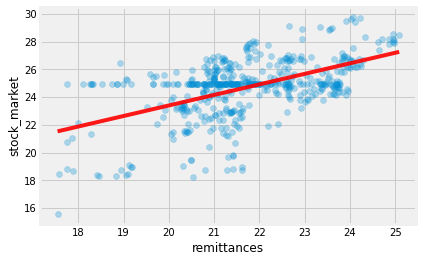

In [338]:
# We pick 100 hundred points equally spaced from the min to the max 
X_prime = np.linspace(X.remittances.min(), X.remittances.max(), 100)[:, np.newaxis] 
X_prime = sm.add_constant(X_prime) 
# add constant as we did before 
# Now we calculate the predicted values 
y_hat = est.predict(X_prime) 
plt.scatter(X.remittances, y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("remittances") 
plt.ylabel("stock_market") 
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 
# Add the regression line, colored in red Populating the interactive namespace from numpy and matplotlib

In [340]:
est = smf.ols(formula='stock_market~ remittances', data=frames).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stock_market   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     200.4
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.53e-38
Time:                        17:51:13   Log-Likelihood:                -1009.1
No. Observations:                 506   AIC:                             2022.
Df Residuals:                     504   BIC:                             2031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2049      1.167      7.028      0.000       5.911      10.499
remittances     0.7596      0.054     14.156      0.000       0.654       0.865
==============================================================================
Omnibus:                       35.434   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.415
Skew:                          -0.622   Prob(JB):                     6.16e-10
Kurtosis:                       3.681   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
# Fit the no-intercept model 
est_no_int = smf.ols(formula='stock_market~ remittances - 1', data=frames).fit() 
# We pick 100 hundred points equally spaced from the min to the max 
X_prime_1 = pd.DataFrame({'remittances': np.linspace(X.remittances.min(), X.remittances.max(), 100)}) X_prime_1 = sm.add_constant(X_prime_1) 
# add constant as we did before 
y_hat_int = est.predict(X_prime_1) 
y_hat_no_int = est_no_int.predict(X_prime_1) 
fig = plt.figure(figsize=(8,4)) 
splt = plt.subplot(121) 
splt.scatter(X.remittances, y, alpha=0.3) # Plot the raw data plt.ylim(30, 100) 
# Set the y-axis to be the same 
plt.xlabel("remittances") 
plt.ylabel("stock_market") 
plt.title("With intercept") 
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9) # Add the regression line, colored in red 
splt = plt.subplot(122) 
splt.scatter(X.remittances, y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("remittances") 
plt.title("Without intercept") 
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9) # Add the regression line, colored in red
#X_prime_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)}) X_prime_1 = sm.add_constant(X_prime_1) 

SyntaxError: invalid syntax (Temp/ipykernel_34472/4154903989.py, line 4)

In [323]:

import statsmodels.formula.api as smf


# Fit regression model (using the natural log of one of the regressors)
#results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=ts[ts['countries']=="Algérie"]).fit()
results = smf.ols('remttances)', data=(ts[ts['countries']=="Algérie"]).fit()
# Inspect the results


SyntaxError: unexpected EOF while parsing (Temp/ipykernel_34472/2002284446.py, line 7)